In [1]:
from dtw import dtw
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
from dtw import dtw
from scipy.spatial import distance_matrix

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
import scipy
scipy.__version__

'1.7.1'

In [138]:
df = pd.read_csv("../data/df_ucr_min_delta.csv")

In [112]:
df.head()

ts_1  no_1  class_1    ts_2  no_2  class_2 type  match_score min_kpi
0  Coffee    11        0  Coffee     5        5  fft        11111     d_m
1  Coffee    11        0  Coffee    10       10  fft        11111  d_mean
2  Coffee    11        0  Coffee    13       13  fft        11111   d_std
3  Coffee    11        0  Coffee    26       26  fft        11111   d_q25
4  Coffee    11        0  Coffee    26       26  fft        11111   d_q50

In [127]:
df_same_ts = df[(df['ts_1']==df['ts_2'])&
               (df['no_1']==df['no_2'])]

df_same_class = df[(df['ts_1']==df['ts_2'])&
               (df['class_1']==df['class_2'])]

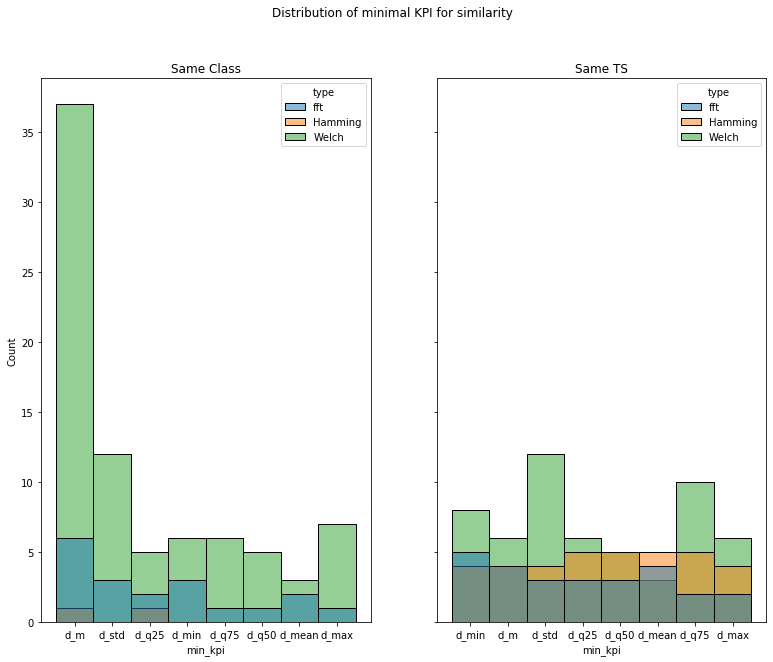

In [138]:
fig, axes = plt.subplots(1, 2, figsize=(13,10), sharey=True)
fig.suptitle('Distribution of minimal KPI for similarity')
axes[0].set_title("Same Class")
axes[1].set_title("Same TS")
sns.histplot(data=df_same_class, ax=axes[0], x='min_kpi', hue='type')
sns.histplot(data=df_same_ts, ax=axes[1], x='min_kpi', hue='type')

In [3]:
df_raw = pd.read_csv("../data/df_ucr_raw_ts.csv")

In [4]:
df_raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64306 entries, 0 to 64305
Columns: 2847 entries, name to 2844
dtypes: float64(2844), int64(2), object(1)
memory usage: 1.4 GB


In [18]:
df_t = df_raw.transpose()

In [6]:
df_min = pd.read_csv("../data/df_ucr_min_delta.csv")

In [7]:
df_min.shape

(28240, 9)

In [8]:
comb_l= list(set(df_min.set_index(['ts_1', 'no_1']).index))

In [9]:
len(comb_l)

1273

In [10]:
comb_l[:3]

[('RefrigerationDevices', 99), ('ECGFiveDays', 445), ('GesturePebbleZ2', 55)]

In [11]:
df_test = pd.read_csv("../data/df_ucr_raw_test.csv")
cols = df_test.columns

In [12]:
df_test = df_test[df_test.set_index(['name', 'no']).index.isin(comb_l)]

In [13]:
df_test.shape

(1420, 2847)

In [14]:
sample = df_test[(df_test['name']=='ProximalPhalanxTW') & 
                (df_test['no']==49)]

In [15]:
sample

name  no  0         1         2         3         4  \
1370  ProximalPhalanxTW  49  3 -0.731328 -0.632351 -0.429001 -0.158977   

             5         6         7  ...  2835  2836  2837  2838  2839  2840  \
1370  0.137678  0.339672  0.573785  ...   NaN   NaN   NaN   NaN   NaN   NaN   

      2841  2842  2843  2844  
1370   NaN   NaN   NaN   NaN  

[1 rows x 2847 columns]

In [32]:
sample)

name  no  0         1         2         3         4  \
1370  ProximalPhalanxTW  49  3 -0.731328 -0.632351 -0.429001 -0.158977   

             5         6         7  ...  2835  2836  2837  2838  2839  2840  \
1370  0.137678  0.339672  0.573785  ...   NaN   NaN   NaN   NaN   NaN   NaN   

      2841  2842  2843  2844  
1370   NaN   NaN   NaN   NaN  

[1 rows x 2847 columns]

In [23]:
tmp = np.array(sample.iloc[:,3:].dropna(axis=1), dtype='float')[0]

In [33]:
tmp.dtype

dtype('float64')

In [17]:
df_t = df_raw.transpose()

In [19]:
df_t.head()

0                 1                 2                 3      \
name  SyntheticControl  SyntheticControl  SyntheticControl  SyntheticControl   
no                   0                 1                 2                 3   
0                    1                 1                 1                 1   
1            -0.376936          0.644406         -0.978667         -0.236537   
2             1.224864          0.413269         -0.406232         -0.098175   

                 4                 5                 6                 7      \
name  SyntheticControl  SyntheticControl  SyntheticControl  SyntheticControl   
no                   4                 5                 6                 7   
0                    1                 1                 1                 1   
1             1.490735          1.643316          1.184702         -1.523098   
2             1.325243          1.764011          0.788449          0.995921   

                 8                 9      ...                       64296  \
name  SyntheticControl  SyntheticControl  ...  NonInvasiveFetalECGThorax2   
no                   8                 9  ...                        1790   
0                    1                 1  ...                          32   
1            -1.370494         -0.824564  ...                    3.983201   
2            -0.695313          0.541666  ...                    3.994629   

                           64297                       64298  \
name  NonInvasiveFetalECGThorax2  NonInvasiveFetalECGThorax2   
no                          1791                        1792   
0                             17                          21   
1                        3.40199                    3.240341   
2                       3.472225                    3.184708   

                           64299                       64300  \
name  NonInvasiveFetalECGThorax2  NonInvasiveFetalECGThorax2   
no                          1793                        1794   
0                              2                          18   
1                       3.553831                     4.27954   
2                       3.406305                    4.410038   

                           64301                       64302  \
name  NonInvasiveFetalECGThorax2  NonInvasiveFetalECGThorax2   
no                          1795                        1796   
0                             32                           6   
1                       4.005686                    3.788338   
2                       4.029141                    3.662464   

                           64303                       64304  \
name  NonInvasiveFetalECGThorax2  NonInvasiveFetalECGThorax2   
no                          1797                        1798   
0                              3                          38   
1                       3.183675                    3.605358   
2                       3.307974                    3.605358   

                           64305  
name  NonInvasiveFetalECGThorax2  
no                          1799  
0                             28  
1                       4.427233  
2                       4.389027  

[5 rows x 64306 columns]

In [20]:
df_t.shape

(2847, 64306)

In [30]:
df_try = df_raw.iloc[:,3:]

In [31]:
df_try = df_try[:15]

In [35]:
sample

name  no  0         1         2         3         4  \
1370  ProximalPhalanxTW  49  3 -0.731328 -0.632351 -0.429001 -0.158977   

             5         6         7  ...  2835  2836  2837  2838  2839  2840  \
1370  0.137678  0.339672  0.573785  ...   NaN   NaN   NaN   NaN   NaN   NaN   

      2841  2842  2843  2844  
1370   NaN   NaN   NaN   NaN  

[1 rows x 2847 columns]

In [37]:
aln_test = dtw(df_try, distance_only=True, local)

ValueError: ndarray is not C-contiguous

In [38]:
def func(s: pd.Series, tmpl: np.ndarray):
    test_q = s.iloc[3:].dropna().to_numpy(dtype='float')
    aln = dtw(test_q, tmpl, distance_only=True)
    return aln.distance
    

In [39]:
tqdm.pandas()
s_res = df_t.progress_apply(func, args=(tmp,))

  0%|          | 0/64306 [00:00<?, ?it/s]

In [22]:
s_check = s_res.reset_index(drop=True)

In [23]:
idx_min = s_check.idxmin()

In [24]:
idx_min

34957

In [25]:
df_t.iloc[:,idx_min]

name    ProximalPhalanxOutlineAgeGroup
no                                 179
0                                    1
1                            -0.731328
2                            -0.632351
                     ...              
2840                               NaN
2841                               NaN
2842                               NaN
2843                               NaN
2844                               NaN
Name: 34957, Length: 2847, dtype: object

## Test implementation with scipy distance matrix

In [59]:
ar1 = np.random.randint(0,2,(2,4), dtype='int64')
ar2 = np.random.randint(0,2,(2,4), dtype='int64')

In [60]:
distance_matrix(ar1, ar2, 2)

array([[1.73205081, 1.41421356],
       [1.41421356, 1.        ]])

In [61]:
ar1

array([[1, 0, 1, 1],
       [0, 0, 1, 1]])

In [62]:
ar2

array([[0, 1, 0, 1],
       [0, 0, 0, 1]])

In [71]:
!conda update --all -y

Solving environment: done

## Package Plan ##

  environment location: /Users/philipp/anaconda3/envs/unic2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-0.13.0             |   py39hecd8cb5_0         178 KB
    anyio-2.2.0                |   py39hecd8cb5_1         125 KB
    appdirs-1.4.4              |     pyhd3eb1b0_0          12 KB
    appnope-0.1.2              |py39hecd8cb5_1001          10 KB
    astor-0.8.1                |   py39hecd8cb5_0          47 KB
    async_generator-1.10       |     pyhd3eb1b0_0          23 KB
    attrs-21.2.0               |     pyhd3eb1b0_0          46 KB
    babel-2.9.1                |     pyhd3eb1b0_0         5.5 MB
    bleach-4.0.0               |     pyhd3eb1b0_0         113 KB
    bokeh-2.3.3                |   py39hecd8cb5_0         5.8 MB
    bottleneck-1.3.2           |   py39he3068b8_1         111 KB
    brotli-1.0.9               |